In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import seaborn as sns 
sns.set_style('ticks');
current_colors = sns.color_palette()

In [40]:
def find_mut_pos(mutation):
    mut_list = mutation.split(':')
    return np.array(map(lambda x: 20-int(x[:-1]), mut_list))

In [71]:
data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
data.rename(columns={'slope': 'on_rate (Hz)'}, inplace=True)
data= data[data['seq'].apply(lambda x: x[-2:]=='GG')]
data.drop(['p5', 'p95', 'seq', 'series', 'count'], axis=1, inplace=True)
data['se2'] = data['se']**2
data = data[data['nmut']==2]
data['MM_pos'] = data['mutations'].apply(find_mut_pos)
data['MM_pos'] = data['MM_pos'].apply(lambda x: list(x[x>0]))
data.drop(['nmut'], axis=1, inplace=True)
data = data[data['MM_pos'].apply(len)>0]

In [72]:
data_2MM = data[data['MM_pos'].apply(len)==2].copy()
data_2MM['1st_MM_pos'] = data_2MM['MM_pos'].apply(lambda x: x[1])
data_2MM_av = data_2MM[['1st_MM_pos', 'on_rate (Hz)']].groupby('1st_MM_pos').mean()
data_2MM_av['se'] = ((data_2MM[['1st_MM_pos', 'se2']].groupby('1st_MM_pos').sum())/(data_2MM[['1st_MM_pos', 'se2']].groupby('1st_MM_pos').count())).apply(np.sqrt)
data_2MM_av.reset_index(inplace=True)

In [73]:
data_1MM = data[data['MM_pos'].apply(len)==1].copy()
data_1MM['1st_MM_pos'] = data_1MM['MM_pos'].apply(lambda x: x[0])
data_1MM_av = data_1MM[['1st_MM_pos', 'on_rate (Hz)']].groupby('1st_MM_pos').mean()
data_1MM_av['se'] = ((data_1MM[['1st_MM_pos', 'se2']].groupby('1st_MM_pos').sum())/(data_1MM[['1st_MM_pos', 'se2']].groupby('1st_MM_pos').count())).apply(np.sqrt)
data_1MM_av.reset_index(inplace=True)

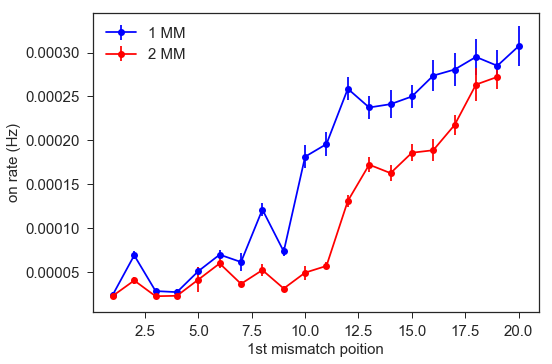

In [82]:
x1 = np.array(data_1MM_av['1st_MM_pos'])
y1 = np.array(data_1MM_av['on_rate (Hz)'])
err1 = np.array(data_1MM_av['se'])

x2 = np.array(data_2MM_av['1st_MM_pos'])
y2 = np.array(data_2MM_av['on_rate (Hz)'])
err2 = np.array(data_2MM_av['se'])

plt.figure(1)
plt.errorbar(x1,y1, yerr=err1, marker='o', color='b', label = '1 MM')
plt.errorbar(x2,y2, yerr=err2, marker='o', color='r', label = '2 MM')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('on rate (Hz)', fontsize=15)
plt.legend(fontsize=15, loc='best')
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);